In [ ]:
pip install pmdarima

     |████████████████████████████████| 1.4 MB 6.7 MB/s 
     |████████████████████████████████| 9.8 MB 9.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/state_wise_daily.csv',index_col='Date_YMD')
data.drop(["Date"],inplace=True,axis=1)
data.head()
confirmed=data[data['Status']=='Confirmed']
recovered=data[data["Status"]=='Recovered']
deceased=data[data["Status"]=='Deceased']

In [ ]:
confirmed.drop(["Status"],inplace=True,axis=1)
recovered.drop(["Status"],inplace=True,axis=1)
deceased.drop(["Status"],inplace=True,axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## List of state abbrevations  TT	AN	AP	AR	AS	BR	CH	CT	DN	DD	DL	GA	GJ	HR	HP	JK	JH	KA	KL	LA	LD	MP	MH	MN	ML	MZ	NL	OR	PY	PB	RJ	SK	TN	TG	TR	UP	UT	WB	UN

In [ ]:
target_state=input()
data=pd.DataFrame(confirmed[target_state])
data["recovered"]=(recovered[target_state])
data["deceased"]=(deceased[target_state])
data.columns=["confirmed","recovered","deceased"]

TT


In [ ]:
data

,confirmed,recovered,deceased
Date_YMD,,,
2020-03-14,81,9,2
2020-03-15,27,4,0
2020-03-16,15,1,0
2020-03-17,11,1,1
2020-03-18,37,0,0
...,...,...,...
2021-06-29,46104,60789,819
2021-06-30,48606,61813,1002
2021-07-01,46781,59054,857


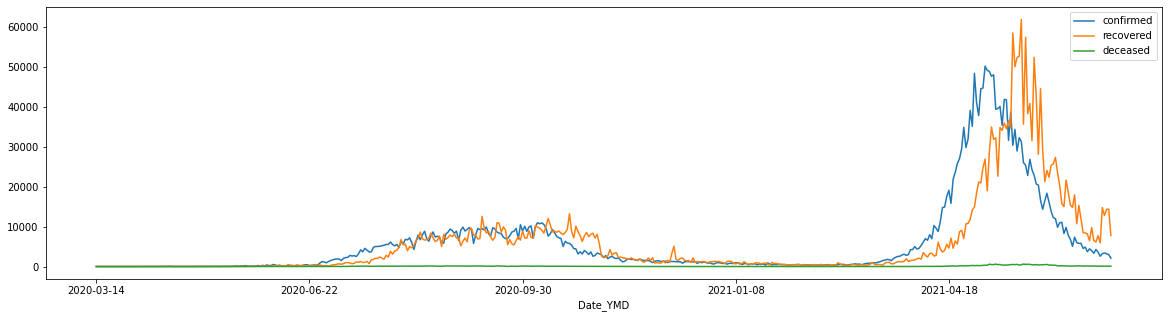

In [ ]:
data.plot(figsize=(20,5),legend=True)

In [ ]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(data['confirmed'])

1. ADF :  -3.2234147883494573
2. P-Value :  0.018668720177730146
3. Num Of Lags :  17
4. Num Of Observations Used For ADF Regression: 459
5. Critical Values :
	 1% :  -3.4446773373329576
	 5% :  -2.8678574606780654
	 10% :  -2.5701349669405404


In [ ]:

from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [ ]:
stepwise_fit = auto_arima(data['confirmed'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=9835.209, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9896.128, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9879.932, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9878.100, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9894.191, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=9857.288, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=9864.578, Time=0.35 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=9833.775, Time=0.49 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=9835.788, Time=0.48 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=9825.755, Time=0.63 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=9875.153, Time=0.30 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=9814.434, Time=1.00 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=9876.945, Time=0.44 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=9788.737, Time=1.84 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept

In [ ]:
train=data.iloc[:-15]
test=data.iloc[-15:]
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['confirmed'],order=(4,1,5))
model=model.fit()

NotImplementedError: ignored

2021-04-18    17075.660147
2021-04-19    18407.454923
2021-04-20    19124.399095
2021-04-21    20703.569161
2021-04-22    23721.154838
                  ...     
2021-06-29     2999.649036
2021-06-30     2821.559397
2021-07-01     2748.832626
2021-07-02     2616.998511
2021-07-03     2545.111283
Freq: D, Length: 77, dtype: float64


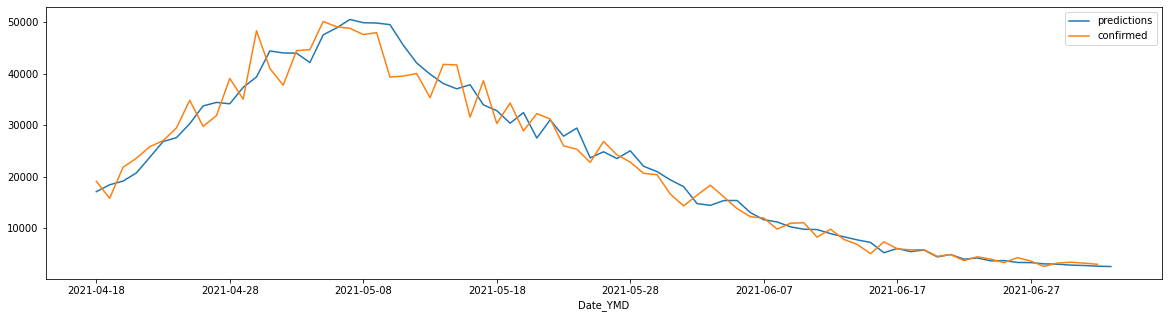

In [ ]:
start=400
#end=len(train)+len(test)-1
end=len(data)-1
pred=model.predict(start=start,end=end,typ='levels')
print(pred)
pred.index=data.index[start:end+1]
pred=pd.DataFrame(pred)
pred.columns=["predictions"]
pred.plot(figsize=(20,5),legend=True)
data['confirmed'][start:end].plot(legend=True)

In [ ]:
model=ARIMA(data['confirmed'],order=(2,1,5))
model=model.fit()
indexfuture=pd.date_range(start="2021-07-03",end="2021-08-01")
print(len(indexfuture))
pred2=model.predict(start=len(data),end=len(data)+29,typ='levels').rename("Arima predictions")
pred2.index=indexfuture

30


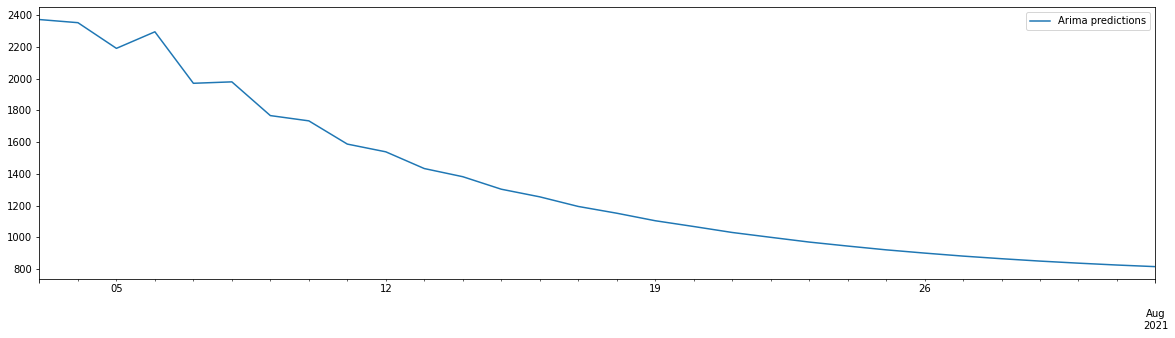

In [ ]:
pred2.plot(legend=True,figsize=(20,5))

# ignore

In [ ]:
pip install pmdarima==1.8.1

In [ ]:
import numpy as np
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/state_wise_daily.csv',index_col='Date_YMD')
data.drop(["Date"],inplace=True,axis=1)
data.head()
confirmed=data[data['Status']=='Confirmed']
recovered=data[data["Status"]=='Recovered']
deceased=data[data["Status"]=='Deceased']
confirmed.drop(["Status"],inplace=True,axis=1)
recovered.drop(["Status"],inplace=True,axis=1)
deceased.drop(["Status"],inplace=True,axis=1)
target_state=input()
data=pd.DataFrame(confirmed[target_state])
data["recovered"]=(recovered[target_state])
data["deceased"]=(deceased[target_state])
data.columns=["confirmed","recovered","deceased"]

KA


In [ ]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")
stepwise_fit = auto_arima(data['confirmed'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8310.984, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8401.693, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8328.954, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8342.510, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8399.697, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8258.818, Time=0.90 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=8319.309, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8330.777, Time=0.12 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=8306.031, Time=0.56 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=8320.297, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8301.807, Time=0.57 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=8248.945, Time=1.20 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=8249.597, Time=0.89 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=8250.434, Time=0.65 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept

In [ ]:
train=data.iloc[:-17]
test=data.iloc[-17:]
stepwise_fit.fit(train['confirmed'])

ARIMA(maxiter=50, method='lbfgs', order=(2, 1, 5), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

Date_YMD
2021-06-07    11958
2021-06-08     9808
2021-06-09    10959
2021-06-10    11042
2021-06-11     8249
2021-06-12     9785
2021-06-13     7810
2021-06-14     6835
2021-06-15     5041
2021-06-16     7345
2021-06-17     5983
2021-06-18     5783
2021-06-19     5815
2021-06-20     4517
2021-06-21     4867
2021-06-22     3709
2021-06-23     4436
2021-06-24     3979
2021-06-25     3310
2021-06-26     4272
2021-06-27     3604
2021-06-28     2576
2021-06-29     3222
2021-06-30     3382
2021-07-01     3203
2021-07-02     2984
Name: confirmed, dtype: int64
[6049.78484165 5455.17500052 5632.14348917 4248.19418373 4675.08910863
 3822.25339293 3956.64315389 3408.13723079 3400.47841862 3030.91477717
 2959.83165653 2699.07016336 2604.82581625 2412.96753411 2315.47022318
 2169.28435438 2077.7528363  1963.29010094 1881.4236781  1789.98037889
 1718.70927421 1644.60883808 1583.54460272 1522.90718933 1471.0967806
 1421.14790566 1377.45651532]


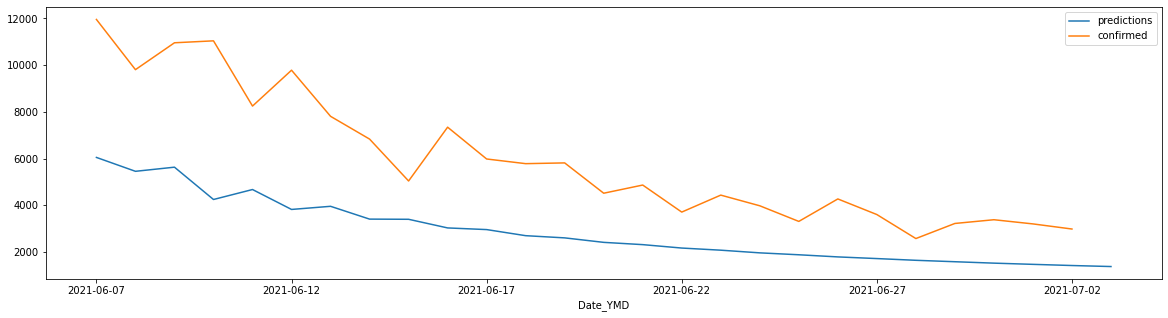

In [ ]:
start=450
#end=len(train)+len(test)-1
end=len(data)-1
pred=stepwise_fit.predict(end+1-start)
testpred = pd.DataFrame(pred,columns=['predictions'],index=data.index[start:end+1])
testpred.plot(figsize=(20,5),legend=True)
data['confirmed'][start:end].plot(legend=True)
print(data['confirmed'][start:end])
print(pred)

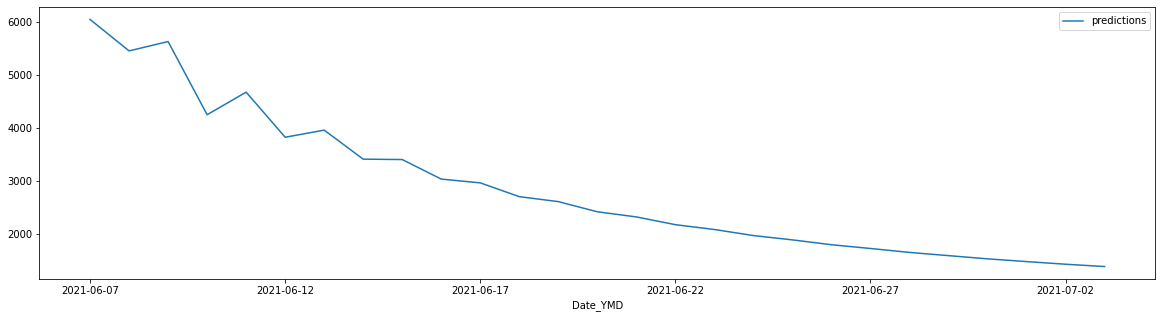

In [ ]:
pred=stepwise_fit.predict(end+1-start)
testpred = pd.DataFrame(pred,columns=['predictions'],index=data.index[start:end+1])
testpred.plot(figsize=(20,5),legend=True)